In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
ls data

dataset/
dog.jpg
fb.jpg
male_01.png
opencv_haarcascade_frontalface_default.xml at master · opencv_opencv.html
opencv_haarcascade_frontalface_default.xml at master · opencv_opencv_files/


In [3]:
ls data/dataset

men/   women/


In [4]:
ls data/dataset/women

00000000.jpg          00001043.jpg          00001782.jpg
00000001.jpg          00001044.jpg          00001783.jpg
00000002.jpg          00001045.jpg          00001785.jpg
00000003.jpg          00001046.jpg          00001786.jpg
00000005.jpeg         00001048.jpg          00001787.jpg
00000006.png          00001049.jpg          00001789.jpg
00000007.jpg          00001050.jpg          00001790.png
00000008.jpg          00001051.jpg          00001792.jpg
00000009.jpg          00001052.jpg          00001793.jpg
00000010.jpg          00001053.jpg          00001794.jpg
00000011.png          00001054.JPG          00001795.jpg
00000013.jpg          00001055.jpg          00001796.jpg
00000014.jpeg         00001056.jpg          00001797.jpg
00000015.jpg          00001057.jpg          00001798.jpg
00000016.jpg          00001058.jpg          00001799.jpg
00000017.jpg          00001059.jpg          00001800.jpg
00000018.jpg          00001061.jpg          00001801.jpg
00000019.jpg          00001062.

In [5]:
from glob import glob

In [19]:
femalepath = glob('./data/dataset/women/*')
malepath = glob('./data/dataset/men/*')

In [20]:
femalepath

['./data/dataset/women/00001722.jpg',
 './data/dataset/women/00001044.jpg',
 './data/dataset/women/00001291.png',
 './data/dataset/women/00001050.jpg',
 './data/dataset/women/00001736.jpg',
 './data/dataset/women/00002217.jpg',
 './data/dataset/women/00001078.jpg',
 './data/dataset/women/00002203.jpg',
 './data/dataset/women/00001939.jpg',
 './data/dataset/women/00000158.png',
 './data/dataset/women/00001905.jpg',
 './data/dataset/women/00001911.jpg',
 './data/dataset/women/00001093.png',
 './data/dataset/women/00001246.jpg',
 './data/dataset/women/00002029.jpg',
 './data/dataset/women/00000148.jpeg',
 './data/dataset/women/00001534.jpg',
 './data/dataset/women/00001252.jpg',
 './data/dataset/women/missclassed (58).jpg',
 './data/dataset/women/00000164.jpg',
 './data/dataset/women/00002015.jpg',
 './data/dataset/women/00001508.jpg',
 './data/dataset/women/00002001.jpg',
 './data/dataset/women/00000170.jpg',
 './data/dataset/women/00001285.jpg',
 './data/dataset/women/00001332.jpg',
 '.

In [21]:
malepath

['./data/dataset/men/00001722.jpg',
 './data/dataset/men/00001044.jpg',
 './data/dataset/men/00001291.png',
 './data/dataset/men/00001050.jpg',
 './data/dataset/men/00001736.jpg',
 './data/dataset/men/00000366.jpg',
 './data/dataset/men/00001078.jpg',
 './data/dataset/men/00000372.jpg',
 './data/dataset/men/00002203.jpg',
 './data/dataset/men/00001087.jpg',
 './data/dataset/men/00000399.jpg',
 './data/dataset/men/00001093.jpg',
 './data/dataset/men/00002029.png',
 './data/dataset/men/00001911.jpg',
 './data/dataset/men/00001252.jpg',
 './data/dataset/men/00000164.jpg',
 './data/dataset/men/00002015.jpg',
 './data/dataset/men/00002001.jpg',
 './data/dataset/men/00000170.jpg',
 './data/dataset/men/00001285.jpg',
 './data/dataset/men/00000825.jpg',
 './data/dataset/men/00000831.jpg',
 './data/dataset/men/00000819.jpg',
 './data/dataset/men/00001020.jpeg',
 './data/dataset/men/00001332.jpg',
 './data/dataset/men/00000992.jpg',
 './data/dataset/men/00000986.jpg',
 './data/dataset/men/000000

In [22]:
len(malepath)

1418

In [23]:
len(femalepath)

1912

In [26]:
#let us consider one image
path = femalepath[0]
img = cv2.imread(path)

In [27]:
img.shape

(418, 618, 3)

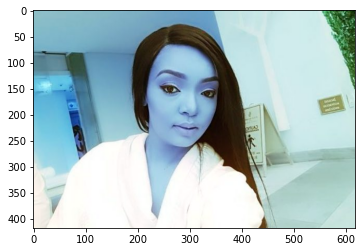

In [29]:
plt.imshow(img)
plt.show()

In [31]:
# convert image into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(418, 618)

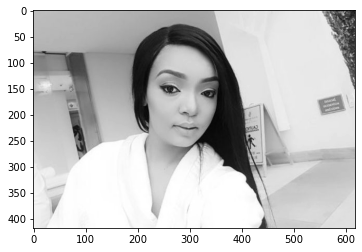

In [32]:
plt.imshow(gray, cmap = 'gray')

In [35]:
# load haar cascade classifier
haar = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [36]:
faces = haar.detectMultiScale(gray,1.5,5)
print(faces)

[[203  82 182 182]]


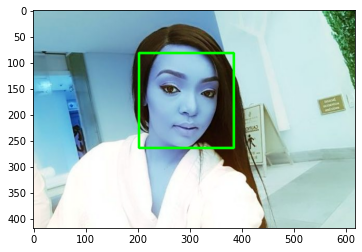

In [37]:
for x,y,w,h in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h), (0,255,0),3)
plt.imshow(img)

In [38]:
# crop the image
crop_img = img[y:y+h, x:x+h]

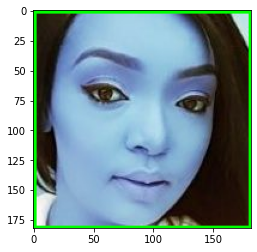

In [39]:
plt.imshow(crop_img)

In [40]:
# save the image
cv2.imwrite('f_01.png',crop_img)

True

In [47]:
# Apply to all the images
def extract_images(path,gender,i):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = haar.detectMultiScale(gray,1.5,5)
    for x,y,w,h in faces:
        roi =img[y:y+h, x:x+h]
        if gender == 'male':
            cv2.imwrite('./data/crop/male_crop/{}_{}.png'.format(gender,i),roi)
        else:
            cv2.imwrite('./data/crop/female_crop/{}_{}.png'.format(gender,i),roi)


In [48]:
extract_images(femalepath[0], 'female',1)

In [49]:
for i,path in enumerate(femalepath):
    try:
        extract_images(path,'female',i)
        print("INFO: {}/{} processed successfully".format(i, len(femalepath)))
    except:
        print("INFO: {}/{} cant be processed successfully".format(i, len(femalepath)))

INFO: 0/1912 processed successfully
INFO: 1/1912 processed successfully
INFO: 2/1912 processed successfully
INFO: 3/1912 processed successfully
INFO: 4/1912 processed successfully
INFO: 5/1912 processed successfully
INFO: 6/1912 processed successfully
INFO: 7/1912 processed successfully
INFO: 8/1912 processed successfully
INFO: 9/1912 processed successfully
INFO: 10/1912 processed successfully
INFO: 11/1912 processed successfully
INFO: 12/1912 processed successfully
INFO: 13/1912 processed successfully
INFO: 14/1912 processed successfully
INFO: 15/1912 processed successfully
INFO: 16/1912 processed successfully
INFO: 17/1912 processed successfully
INFO: 18/1912 processed successfully
INFO: 19/1912 processed successfully
INFO: 20/1912 processed successfully
INFO: 21/1912 processed successfully
INFO: 22/1912 processed successfully
INFO: 23/1912 processed successfully
INFO: 24/1912 processed successfully
INFO: 25/1912 processed successfully
INFO: 26/1912 processed successfully
INFO: 27/19

INFO: 222/1912 processed successfully
INFO: 223/1912 processed successfully
INFO: 224/1912 processed successfully
INFO: 225/1912 processed successfully
INFO: 226/1912 processed successfully
INFO: 227/1912 processed successfully
INFO: 228/1912 processed successfully
INFO: 229/1912 processed successfully
INFO: 230/1912 processed successfully
INFO: 231/1912 processed successfully
INFO: 232/1912 processed successfully
INFO: 233/1912 processed successfully
INFO: 234/1912 processed successfully
INFO: 235/1912 processed successfully
INFO: 236/1912 processed successfully
INFO: 237/1912 processed successfully
INFO: 238/1912 processed successfully
INFO: 239/1912 processed successfully
INFO: 240/1912 processed successfully
INFO: 241/1912 processed successfully
INFO: 242/1912 processed successfully
INFO: 243/1912 processed successfully
INFO: 244/1912 processed successfully
INFO: 245/1912 processed successfully
INFO: 246/1912 processed successfully
INFO: 247/1912 processed successfully
INFO: 248/19

INFO: 440/1912 processed successfully
INFO: 441/1912 processed successfully
INFO: 442/1912 processed successfully
INFO: 443/1912 processed successfully
INFO: 444/1912 processed successfully
INFO: 445/1912 processed successfully
INFO: 446/1912 processed successfully
INFO: 447/1912 processed successfully
INFO: 448/1912 processed successfully
INFO: 449/1912 processed successfully
INFO: 450/1912 processed successfully
INFO: 451/1912 processed successfully
INFO: 452/1912 processed successfully
INFO: 453/1912 processed successfully
INFO: 454/1912 processed successfully
INFO: 455/1912 processed successfully
INFO: 456/1912 processed successfully
INFO: 457/1912 processed successfully
INFO: 458/1912 processed successfully
INFO: 459/1912 processed successfully
INFO: 460/1912 processed successfully
INFO: 461/1912 processed successfully
INFO: 462/1912 processed successfully
INFO: 463/1912 processed successfully
INFO: 464/1912 processed successfully
INFO: 465/1912 processed successfully
INFO: 466/19

INFO: 656/1912 processed successfully
INFO: 657/1912 processed successfully
INFO: 658/1912 processed successfully
INFO: 659/1912 processed successfully
INFO: 660/1912 processed successfully
INFO: 661/1912 processed successfully
INFO: 662/1912 processed successfully
INFO: 663/1912 processed successfully
INFO: 664/1912 processed successfully
INFO: 665/1912 processed successfully
INFO: 666/1912 processed successfully
INFO: 667/1912 processed successfully
INFO: 668/1912 processed successfully
INFO: 669/1912 processed successfully
INFO: 670/1912 processed successfully
INFO: 671/1912 processed successfully
INFO: 672/1912 processed successfully
INFO: 673/1912 processed successfully
INFO: 674/1912 processed successfully
INFO: 675/1912 processed successfully
INFO: 676/1912 processed successfully
INFO: 677/1912 processed successfully
INFO: 678/1912 processed successfully
INFO: 679/1912 processed successfully
INFO: 680/1912 processed successfully
INFO: 681/1912 processed successfully
INFO: 682/19

INFO: 873/1912 processed successfully
INFO: 874/1912 processed successfully
INFO: 875/1912 processed successfully
INFO: 876/1912 processed successfully
INFO: 877/1912 processed successfully
INFO: 878/1912 cant be processed successfully
INFO: 879/1912 processed successfully
INFO: 880/1912 processed successfully
INFO: 881/1912 processed successfully
INFO: 882/1912 processed successfully
INFO: 883/1912 processed successfully
INFO: 884/1912 processed successfully
INFO: 885/1912 processed successfully
INFO: 886/1912 processed successfully
INFO: 887/1912 processed successfully
INFO: 888/1912 processed successfully
INFO: 889/1912 processed successfully
INFO: 890/1912 processed successfully
INFO: 891/1912 processed successfully
INFO: 892/1912 processed successfully
INFO: 893/1912 processed successfully
INFO: 894/1912 processed successfully
INFO: 895/1912 processed successfully
INFO: 896/1912 processed successfully
INFO: 897/1912 processed successfully
INFO: 898/1912 processed successfully
INFO

INFO: 1090/1912 processed successfully
INFO: 1091/1912 processed successfully
INFO: 1092/1912 processed successfully
INFO: 1093/1912 processed successfully
INFO: 1094/1912 processed successfully
INFO: 1095/1912 processed successfully
INFO: 1096/1912 processed successfully
INFO: 1097/1912 processed successfully
INFO: 1098/1912 processed successfully
INFO: 1099/1912 processed successfully
INFO: 1100/1912 processed successfully
INFO: 1101/1912 processed successfully
INFO: 1102/1912 processed successfully
INFO: 1103/1912 processed successfully
INFO: 1104/1912 processed successfully
INFO: 1105/1912 processed successfully
INFO: 1106/1912 processed successfully
INFO: 1107/1912 processed successfully
INFO: 1108/1912 processed successfully
INFO: 1109/1912 processed successfully
INFO: 1110/1912 processed successfully
INFO: 1111/1912 processed successfully
INFO: 1112/1912 processed successfully
INFO: 1113/1912 processed successfully
INFO: 1114/1912 processed successfully
INFO: 1115/1912 processed

INFO: 1302/1912 processed successfully
INFO: 1303/1912 processed successfully
INFO: 1304/1912 processed successfully
INFO: 1305/1912 processed successfully
INFO: 1306/1912 processed successfully
INFO: 1307/1912 processed successfully
INFO: 1308/1912 processed successfully
INFO: 1309/1912 processed successfully
INFO: 1310/1912 processed successfully
INFO: 1311/1912 processed successfully
INFO: 1312/1912 processed successfully
INFO: 1313/1912 processed successfully
INFO: 1314/1912 processed successfully
INFO: 1315/1912 processed successfully
INFO: 1316/1912 processed successfully
INFO: 1317/1912 processed successfully
INFO: 1318/1912 processed successfully
INFO: 1319/1912 processed successfully
INFO: 1320/1912 processed successfully
INFO: 1321/1912 processed successfully
INFO: 1322/1912 processed successfully
INFO: 1323/1912 processed successfully
INFO: 1324/1912 processed successfully
INFO: 1325/1912 processed successfully
INFO: 1326/1912 processed successfully
INFO: 1327/1912 processed

INFO: 1513/1912 processed successfully
INFO: 1514/1912 processed successfully
INFO: 1515/1912 processed successfully
INFO: 1516/1912 processed successfully
INFO: 1517/1912 processed successfully
INFO: 1518/1912 processed successfully
INFO: 1519/1912 processed successfully
INFO: 1520/1912 processed successfully
INFO: 1521/1912 processed successfully
INFO: 1522/1912 processed successfully
INFO: 1523/1912 processed successfully
INFO: 1524/1912 processed successfully
INFO: 1525/1912 processed successfully
INFO: 1526/1912 processed successfully
INFO: 1527/1912 processed successfully
INFO: 1528/1912 processed successfully
INFO: 1529/1912 processed successfully
INFO: 1530/1912 processed successfully
INFO: 1531/1912 processed successfully
INFO: 1532/1912 processed successfully
INFO: 1533/1912 processed successfully
INFO: 1534/1912 processed successfully
INFO: 1535/1912 processed successfully
INFO: 1536/1912 processed successfully
INFO: 1537/1912 processed successfully
INFO: 1538/1912 processed

INFO: 1725/1912 processed successfully
INFO: 1726/1912 processed successfully
INFO: 1727/1912 processed successfully
INFO: 1728/1912 processed successfully
INFO: 1729/1912 processed successfully
INFO: 1730/1912 processed successfully
INFO: 1731/1912 processed successfully
INFO: 1732/1912 processed successfully
INFO: 1733/1912 processed successfully
INFO: 1734/1912 processed successfully
INFO: 1735/1912 processed successfully
INFO: 1736/1912 processed successfully
INFO: 1737/1912 processed successfully
INFO: 1738/1912 processed successfully
INFO: 1739/1912 processed successfully
INFO: 1740/1912 processed successfully
INFO: 1741/1912 processed successfully
INFO: 1742/1912 processed successfully
INFO: 1743/1912 processed successfully
INFO: 1744/1912 processed successfully
INFO: 1745/1912 processed successfully
INFO: 1746/1912 processed successfully
INFO: 1747/1912 processed successfully
INFO: 1748/1912 processed successfully
INFO: 1749/1912 processed successfully
INFO: 1750/1912 processed

In [50]:
for i,path in enumerate(malepath):
    try:
        extract_images(path,'male',i)
        print("INFO: {}/{} processed successfully".format(i, len(malepath)))
    except:
        print("INFO: {}/{} cant be processed successfully".format(i, len(malepath)))

INFO: 0/1418 processed successfully
INFO: 1/1418 processed successfully
INFO: 2/1418 processed successfully
INFO: 3/1418 processed successfully
INFO: 4/1418 processed successfully
INFO: 5/1418 processed successfully
INFO: 6/1418 processed successfully
INFO: 7/1418 processed successfully
INFO: 8/1418 processed successfully
INFO: 9/1418 processed successfully
INFO: 10/1418 processed successfully
INFO: 11/1418 processed successfully
INFO: 12/1418 processed successfully
INFO: 13/1418 processed successfully
INFO: 14/1418 processed successfully
INFO: 15/1418 processed successfully
INFO: 16/1418 processed successfully
INFO: 17/1418 processed successfully
INFO: 18/1418 processed successfully
INFO: 19/1418 processed successfully
INFO: 20/1418 processed successfully
INFO: 21/1418 processed successfully
INFO: 22/1418 processed successfully
INFO: 23/1418 processed successfully
INFO: 24/1418 processed successfully
INFO: 25/1418 processed successfully
INFO: 26/1418 processed successfully
INFO: 27/14

INFO: 218/1418 processed successfully
INFO: 219/1418 processed successfully
INFO: 220/1418 processed successfully
INFO: 221/1418 processed successfully
INFO: 222/1418 processed successfully
INFO: 223/1418 processed successfully
INFO: 224/1418 processed successfully
INFO: 225/1418 processed successfully
INFO: 226/1418 processed successfully
INFO: 227/1418 processed successfully
INFO: 228/1418 processed successfully
INFO: 229/1418 processed successfully
INFO: 230/1418 processed successfully
INFO: 231/1418 processed successfully
INFO: 232/1418 processed successfully
INFO: 233/1418 processed successfully
INFO: 234/1418 processed successfully
INFO: 235/1418 processed successfully
INFO: 236/1418 processed successfully
INFO: 237/1418 processed successfully
INFO: 238/1418 processed successfully
INFO: 239/1418 processed successfully
INFO: 240/1418 processed successfully
INFO: 241/1418 processed successfully
INFO: 242/1418 processed successfully
INFO: 243/1418 processed successfully
INFO: 244/14

INFO: 435/1418 processed successfully
INFO: 436/1418 processed successfully
INFO: 437/1418 processed successfully
INFO: 438/1418 processed successfully
INFO: 439/1418 processed successfully
INFO: 440/1418 processed successfully
INFO: 441/1418 processed successfully
INFO: 442/1418 processed successfully
INFO: 443/1418 processed successfully
INFO: 444/1418 processed successfully
INFO: 445/1418 processed successfully
INFO: 446/1418 processed successfully
INFO: 447/1418 processed successfully
INFO: 448/1418 processed successfully
INFO: 449/1418 processed successfully
INFO: 450/1418 processed successfully
INFO: 451/1418 processed successfully
INFO: 452/1418 processed successfully
INFO: 453/1418 processed successfully
INFO: 454/1418 processed successfully
INFO: 455/1418 processed successfully
INFO: 456/1418 processed successfully
INFO: 457/1418 processed successfully
INFO: 458/1418 processed successfully
INFO: 459/1418 processed successfully
INFO: 460/1418 processed successfully
INFO: 461/14

INFO: 651/1418 processed successfully
INFO: 652/1418 processed successfully
INFO: 653/1418 processed successfully
INFO: 654/1418 processed successfully
INFO: 655/1418 processed successfully
INFO: 656/1418 processed successfully
INFO: 657/1418 processed successfully
INFO: 658/1418 processed successfully
INFO: 659/1418 processed successfully
INFO: 660/1418 processed successfully
INFO: 661/1418 processed successfully
INFO: 662/1418 processed successfully
INFO: 663/1418 processed successfully
INFO: 664/1418 processed successfully
INFO: 665/1418 processed successfully
INFO: 666/1418 processed successfully
INFO: 667/1418 processed successfully
INFO: 668/1418 processed successfully
INFO: 669/1418 processed successfully
INFO: 670/1418 processed successfully
INFO: 671/1418 processed successfully
INFO: 672/1418 processed successfully
INFO: 673/1418 processed successfully
INFO: 674/1418 processed successfully
INFO: 675/1418 processed successfully
INFO: 676/1418 processed successfully
INFO: 677/14

INFO: 868/1418 processed successfully
INFO: 869/1418 processed successfully
INFO: 870/1418 processed successfully
INFO: 871/1418 processed successfully
INFO: 872/1418 processed successfully
INFO: 873/1418 processed successfully
INFO: 874/1418 processed successfully
INFO: 875/1418 processed successfully
INFO: 876/1418 processed successfully
INFO: 877/1418 processed successfully
INFO: 878/1418 processed successfully
INFO: 879/1418 processed successfully
INFO: 880/1418 processed successfully
INFO: 881/1418 processed successfully
INFO: 882/1418 processed successfully
INFO: 883/1418 processed successfully
INFO: 884/1418 processed successfully
INFO: 885/1418 processed successfully
INFO: 886/1418 processed successfully
INFO: 887/1418 processed successfully
INFO: 888/1418 processed successfully
INFO: 889/1418 processed successfully
INFO: 890/1418 processed successfully
INFO: 891/1418 processed successfully
INFO: 892/1418 processed successfully
INFO: 893/1418 processed successfully
INFO: 894/14

INFO: 1085/1418 processed successfully
INFO: 1086/1418 processed successfully
INFO: 1087/1418 processed successfully
INFO: 1088/1418 processed successfully
INFO: 1089/1418 processed successfully
INFO: 1090/1418 processed successfully
INFO: 1091/1418 processed successfully
INFO: 1092/1418 processed successfully
INFO: 1093/1418 processed successfully
INFO: 1094/1418 processed successfully
INFO: 1095/1418 processed successfully
INFO: 1096/1418 processed successfully
INFO: 1097/1418 processed successfully
INFO: 1098/1418 processed successfully
INFO: 1099/1418 processed successfully
INFO: 1100/1418 processed successfully
INFO: 1101/1418 processed successfully
INFO: 1102/1418 processed successfully
INFO: 1103/1418 processed successfully
INFO: 1104/1418 processed successfully
INFO: 1105/1418 processed successfully
INFO: 1106/1418 processed successfully
INFO: 1107/1418 processed successfully
INFO: 1108/1418 processed successfully
INFO: 1109/1418 processed successfully
INFO: 1110/1418 processed

INFO: 1295/1418 processed successfully
INFO: 1296/1418 processed successfully
INFO: 1297/1418 processed successfully
INFO: 1298/1418 processed successfully
INFO: 1299/1418 processed successfully
INFO: 1300/1418 processed successfully
INFO: 1301/1418 processed successfully
INFO: 1302/1418 processed successfully
INFO: 1303/1418 processed successfully
INFO: 1304/1418 processed successfully
INFO: 1305/1418 processed successfully
INFO: 1306/1418 processed successfully
INFO: 1307/1418 processed successfully
INFO: 1308/1418 processed successfully
INFO: 1309/1418 processed successfully
INFO: 1310/1418 processed successfully
INFO: 1311/1418 processed successfully
INFO: 1312/1418 processed successfully
INFO: 1313/1418 processed successfully
INFO: 1314/1418 processed successfully
INFO: 1315/1418 processed successfully
INFO: 1316/1418 processed successfully
INFO: 1317/1418 processed successfully
INFO: 1318/1418 processed successfully
INFO: 1319/1418 processed successfully
INFO: 1320/1418 processed